<a href="https://colab.research.google.com/github/kashmanovav-lab/ML_labs/blob/main/Lab_2_3375_Kashmanova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Для 2 лабораторной работы я решила добавить в датасет "seeds" новый признак aspect_ratio - соотношение сторон ядра.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
columns = [
    'area',
    'perimeter',
    'compactness',
    'length_of_kernel',
    'width_of_kernel',
    'asymmetry_coefficient',
    'length_of_groove',
    'class'
]
df = pd.read_csv(url, sep=r'\s+', names=columns, header=None)

print("Первые 5 строк:")
display(df.head())

Первые 5 строк:


,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Импортировали библиотеку, считали данные и вывели первые 5 строк.

In [21]:
df['aspect_ratio'] = df['length_of_kernel'] / df['width_of_kernel']

print("Новый признак 'aspect_ratio' добавлен.\n")
print(df[['length_of_kernel', 'width_of_kernel', 'aspect_ratio']].head())

Новый признак 'aspect_ratio' добавлен.

   length_of_kernel  width_of_kernel  aspect_ratio
0             5.763            3.312      1.740036
1             5.554            3.333      1.666367
2             5.291            3.337      1.585556
3             5.324            3.379      1.575614
4             5.658            3.562      1.588433


Создали новый признак 'aspect_ratio'.

Дубликаты: 0

Пропущенные значения:
area                     0
perimeter                0
compactness              0
length_of_kernel         0
width_of_kernel          0
asymmetry_coefficient    0
length_of_groove         0
class                    0
aspect_ratio             0
dtype: int64


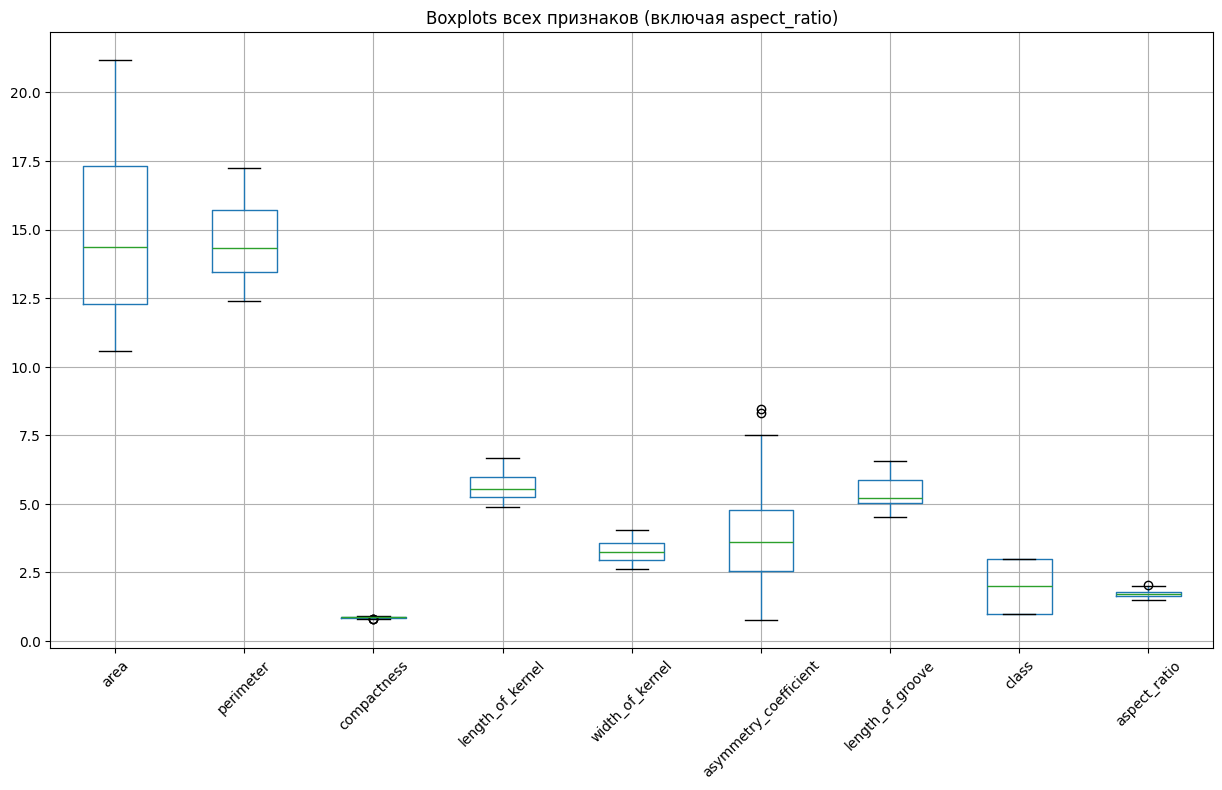

In [22]:
duplicates = df.duplicated().sum()
print(f"Дубликаты: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()

print("\nПропущенные значения:")
print(df.isna().sum())

plt.figure(figsize=(15, 8))
df.boxplot()
plt.title("Boxplots всех признаков (включая aspect_ratio)")
plt.xticks(rotation=45)
plt.show()


"Причесываем" датасет. Дубликатов и пропусков нет. Есть выбросы, но они минимальны, поэтому оставляем все, как есть.

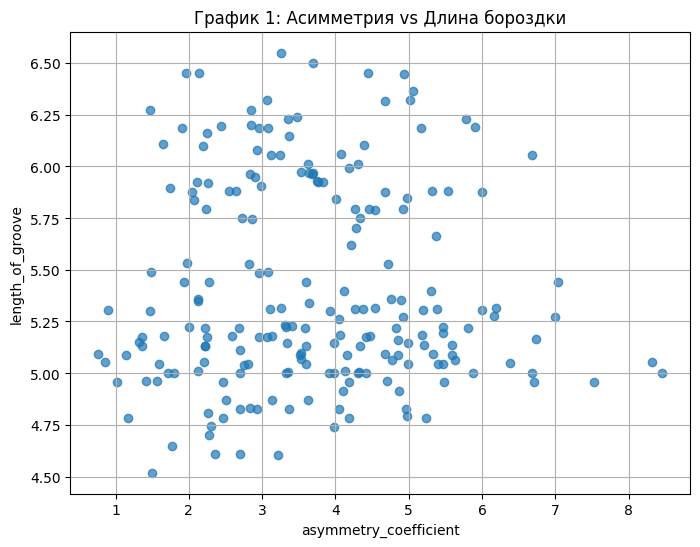

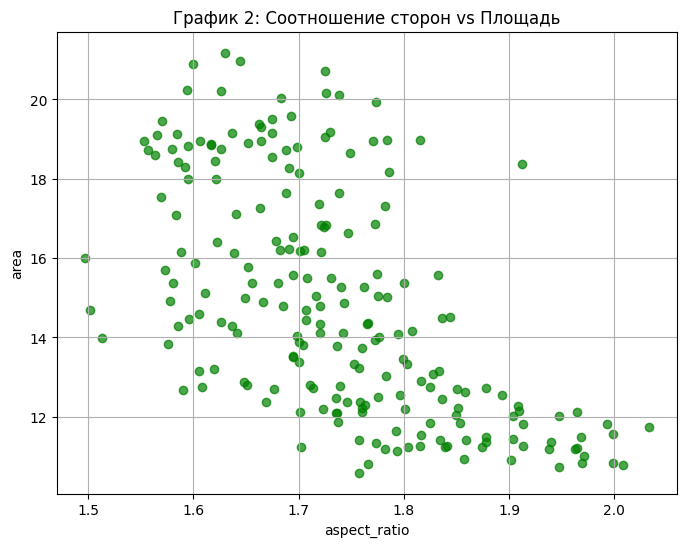

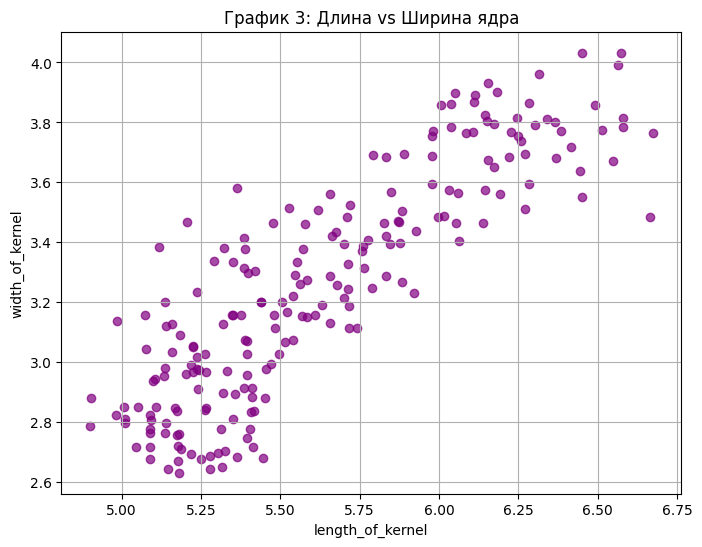

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(df['asymmetry_coefficient'], df['length_of_groove'], alpha=0.7)
plt.xlabel('asymmetry_coefficient')
plt.ylabel('length_of_groove')
plt.title('График 1: Асимметрия vs Длина бороздки')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df['aspect_ratio'], df['area'], alpha=0.7, color='green')
plt.xlabel('aspect_ratio')
plt.ylabel('area')
plt.title('График 2: Соотношение сторон vs Площадь')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df['length_of_kernel'], df['width_of_kernel'], alpha=0.7, color='purple')
plt.xlabel('length_of_kernel')
plt.ylabel('width_of_kernel')
plt.title('График 3: Длина vs Ширина ядра')
plt.grid(True)
plt.show()


Из матрицы рассеивания ищем кластеры, выбираем графики, на котрых можно увидеть компактные группы (3 группы -классы).

In [24]:
X = df.drop(columns=['class'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Данные стандартизированы.")

Данные стандартизированы.


Подготовили данные для KMeans. (У нас изначально была целевая переменная 'class', мы ее удаляем)

In [25]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
df['cluster'] = kmeans.fit_predict(X_scaled)

print("\nСравнение кластеров и истинных классов:")
comparison = pd.crosstab(df['class'], df['cluster'], rownames=['Истинный класс'], colnames=['Кластер'])
display(comparison)


Сравнение кластеров и истинных классов:


Кластер,0,1,2
Истинный класс,,,
1,2,4,64
2,65,0,5
3,0,63,7


Обозначаем k=3, т.к. изначально известно о 3 сортах пшеницы. Получили 3 кластера, но они не идентичны начальным классам, хотя различия совсем небольшие.

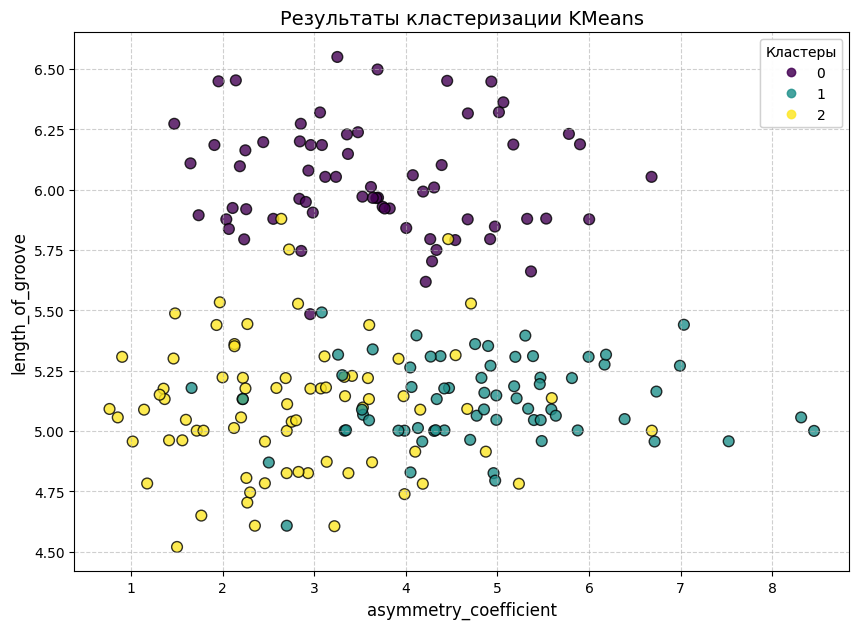

In [26]:
x_feature = 'asymmetry_coefficient'
y_feature = 'length_of_groove'

plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    df[x_feature],
    df[y_feature],
    c=df['cluster'],
    cmap='viridis',
    s=60,
    edgecolor='k',
    alpha=0.8
)
plt.xlabel(x_feature, fontsize=12)
plt.ylabel(y_feature, fontsize=12)
plt.title('Результаты кластеризации KMeans', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

legend1 = plt.legend(*scatter.legend_elements(), title="Кластеры")
plt.gca().add_artist(legend1)

plt.show()

Показали результаты кластеризации на графике "Ассиметрия / Длина бороздки".

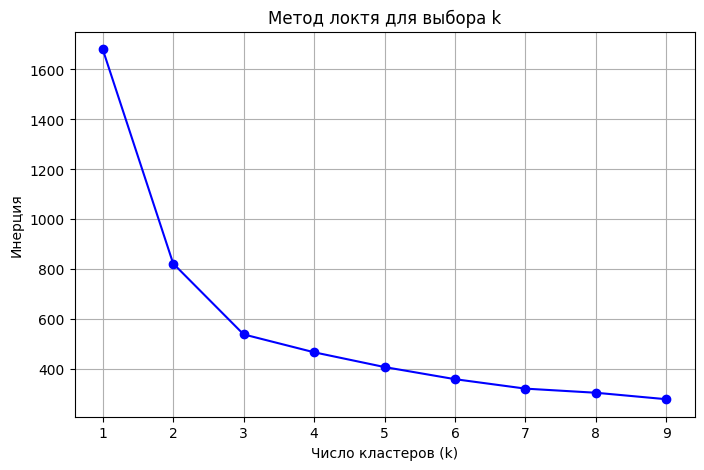

In [27]:
inertias = []
K_range = range(1, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Число кластеров (k)')
plt.ylabel('Инерция')
plt.title('Метод локтя для выбора k')
plt.grid(True)
plt.show()

Также я рассмотрела метод локтя, по которому тоже походит кол-во кластеров 3. K = 3 - "локоть", т.к. после него наблюдается снижение инерции.

## Выводы

1. **Добавлен новый признак 'aspect_ratio'.**

2. **Датасет "чистый": нет пропусков, дубликатов и выраженных выбросов.**

3. **Видны 3 группы, что соответствует сортам пшеницы.**

4. **KMeans с k=3 выделил кластеры, при этом**:  
   - Большинство объектов из одного класса попали в один кластер;  
   - Небольшие пересечения объясняются схожестью признаков между сортами.